# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from xgboost import plot_importance
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
import joblib

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Study Dataset

In [2]:
pd.set_option('display.max_columns', None) #setting to display all columns in df.head

In [76]:
df =pd.read_csv("https://raw.githubusercontent.com/chunlai315/predict/master/UCI_Credit_Card.csv") #load dataset
print(df.shape) #print number of rows and columns of dataset
print(df.isnull().sum()) #print number of zeroes in each col in dataset
df.head()

(30000, 25)
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

In [77]:
df.rename(columns={"default.payment.next.month": "Default"},inplace=True) #rename column "default.payment.next.month" to "Default"

In [78]:
df = df.drop("ID", axis = 1)

In [194]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("ProfileReport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualization

In [8]:
fig1 = px.scatter(df, x="AGE", color = "Default")
fig1

In [9]:
fig2 = px.scatter(df, x="BILL_AMT2", color = "Default") #toggle LIMIT_BAL/BILL_AMT1/LIMIT_BAL2 etc
fig2

In [256]:
fig3 = px.histogram(df, x='SEX', color='Default', barmode = 'group', text_auto = True, title = "Default vs Sex", height=450)
fig3

Default rate is lower for female

In [258]:
df_edu=df.groupby(['Default',"EDUCATION"]).size().reset_index().pivot(columns='Default', index="EDUCATION",values=0)
df_edu["Default_rate"]=df_edu[df_edu.columns[1]]/(df_edu[df_edu.columns[0]] + df_edu[df_edu.columns[1]])
print(df_edu)

Default          0       1  Default_rate
EDUCATION                               
0             14.0     NaN           NaN
1           8549.0  2036.0      0.192348
2          10700.0  3330.0      0.237349
3           3680.0  1237.0      0.251576
4            116.0     7.0      0.056911
5            262.0    18.0      0.064286
6             43.0     8.0      0.156863


In [232]:
fig4 = px.histogram(df, x='EDUCATION', color='Default', barmode = 'group', text_auto = True, title = "Default vs Edu",   height=450)
fig4

High school Education background has highest default rate

In [233]:
fig5 = px.histogram(df, x='MARRIAGE', color='Default', barmode = 'group', text_auto = True, title = "Default vs Edu",   height=450)
fig5

Married has higher default rate than single

C:\Users\starl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\starl\AppData\Local\Temp/ipykernel_12988/1543808408.py:10: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



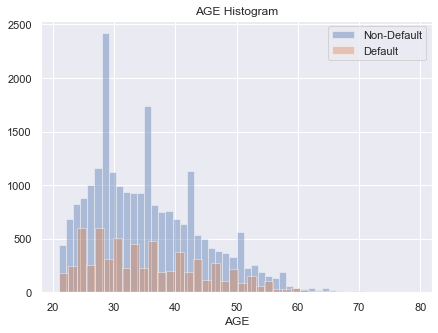

In [234]:
sns.set()
fig =plt.figure(figsize = (7,5))
ax =plt.subplot()

sns.distplot(df["AGE"][df['Default']==0],label ='Non-Default',kde =False)
sns.distplot(df["AGE"][df['Default']==1],label ='Default',kde=False)

plt.legend(loc ='upper right')
plt.title("AGE Histogram")
fig.show()

# Standardized columns


In [10]:
col_to_norm = ['AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6','LIMIT_BAL', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df[col_to_norm])
scaled_X=scaler.transform(df[col_to_norm])
df[col_to_norm]=scaled_X  

# Split the train test set

Feature Engineering

In [261]:
#df.drop(["AGE","SEX", "EDUCATION", "MARRIAGE","PAY_4","PAY_5","PAY_6","BILL_AMT4","BILL_AMT5","BILL_AMT6", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"],axis=1,inplace=True)

In [12]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0  -1.136720    2          2         1 -1.246020      2      2     -1     -1   
1  -0.365981    2          2         2 -1.029047     -1      2      0      0   
2  -0.597202    2          2         2 -0.161156      0      0      0      0   
3  -0.905498    2          2         1  0.164303      0      0      0      0   
4  -0.905498    1          2         1  2.334029     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2  -0.642501  -0.647399  -0.667993  -0.672497  -0.663059   
1      0      2  -0.659219  -0.666747  -0.639254  -0.621636  -0.606229   
2      0      0  -0.298560  -0.493899  -0.482408  -0.449730  -0.417188   
3      0      0  -0.057491  -0.013293   0.032846  -0.232373  -0.186729   
4      0      0  -0.578618  -0.611318  -0.161189  -0.346997  -0.348137   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0  -0.652724 -0.341942 -0.227086 -0.296801 -0.308063 -0.314136 -0.293382   
1  -0.597966 -0.341942 -0.213588 -0.240005 -0.244230 -0.314136 -0.180878   
2  -0.391630 -0.250292 -0.191887 -0.240005 -0.244230 -0.248683 -0.012122   
3  -0.156579 -0.221191 -0.169361 -0.228645 -0.237846 -0.244166 -0.237130   
4  -0.331482 -0.221191  1.335034  0.271165  0.266434 -0.269039 -0.255187   

   Default  
0        1  
1        1  
2        0  
3        0  
4        0

Splitting

In [79]:
X = df.drop(["Default"],axis=1)
Y = df["Default"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=2020)

In [81]:
X_test.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
1443    200000.0    1          3         0   51     -1     -1     -1     -1   
10708   230000.0    2          2         2   30      0      0      0      0   
23065   150000.0    2          2         1   41      2      2      2      2   
1575    230000.0    2          2         2   25      0      0      0      0   
9665    360000.0    2          1         2   27      0      0      0      0   

       PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
1443       0     -1     3556.0     4993.0     9212.0     2529.0     1036.0   
10708      0      0   112402.0   116273.0   118467.0   108826.0   100862.0   
23065      2      2    68571.0    69845.0    71434.0    72365.0    73377.0   
1575       0      2    95311.0    94489.0    93143.0    87654.0    90172.0   
9665       0      2    21275.0    22517.0    23707.0    24145.0    24068.0   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
1443      4430.0    5020.0    9236.0    2529.0       0.0    4430.0    6398.0  
10708    92481.0    6000.0    6000.0    4000.0    4000.0    3500.0    4000.0  
23065    75052.0    3000.0    3300.0    2700.0    2800.0    3000.0    2800.0  
1575     86850.0    4500.0    4114.0    3500.0    4000.0    3000.0    3000.0  
9665     24350.0    1800.0    1800.0    1000.0    1649.0    1003.0       3.0

In [82]:
X_train.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
17119   300000.0    2          3         2   27      0      0      0      0   
27843    20000.0    2          3         2   26      1      2      0      0   
8139     50000.0    2          2         1   34      1      2      2      0   
22092   190000.0    2          1         2   28      0      0      0      0   
18072    10000.0    1          2         2   29      1      2      2      2   

       PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
17119      0      0   105786.0   113850.0   116918.0   119929.0   122914.0   
27843      0      0    18025.0    17443.0    18117.0    17040.0    17763.0   
8139       0      2    51046.0    52337.0    51170.0    51526.0    50524.0   
22092      0      0   112039.0   114347.0   102229.0    83779.0    72666.0   
18072      2      0     8393.0     9069.0     8019.0     5819.0     5626.0   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
17119   125910.0    9000.0    4000.0    4000.0    4000.0    4000.0    4000.0  
27843    17666.0       0.0    1277.0    1300.0    1000.0     799.0    2000.0  
8139     48510.0    2400.0       0.0    3000.0    6000.0       0.0    2000.0  
22092    63714.0    4600.0    4500.0    4000.0    2900.0    2800.0    3000.0  
18072     5621.0    1000.0    2000.0    1000.0       0.0    2000.0    1000.0

# Logistic Regression

In [17]:
param_range={'C': range(10,201,10)}
lr = GridSearchCV(estimator=LogisticRegression(),
                       param_grid=param_range,
                       cv=5,
                       scoring='accuracy',
                       refit=True)
start = time.time()
lr.fit(X_train, y_train)
# count time
end = time.time()
duration = end - start
print('LogisticRgression:')
print(f'time to train{duration:.4f}s')
print(f'best parameter is {lr.best_params_}')

y_train_pred = lr.predict(X_train)
train_score = accuracy_score(y_train, y_train_pred)
print('train_set ACC：{:.3f}'.format(train_score))

y_test_pred = lr.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
print('test_set ACC：{:.3f}'.format(test_score))
print(confusion_matrix(y_test, y_test_pred))

LogisticRgression:
time to train5.1613s
best parameter is {'C': 10}
train_set ACC：0.810
test_set ACC：0.812
[[6824  154]
 [1538  484]]


# Decision Tree

In [18]:
param_range= {'max_depth': range(2,21,2)}
dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                       param_grid=param_range,
                       cv=5,
                       scoring='accuracy',
                       refit=True)
start = time.time()
dt.fit(X_train, y_train)
# count time
end = time.time()
duration = end - start
print('DecisionTreeClassifier:')
print(f'time to train {duration:.4f}s')
print(f'best parameter is {dt.best_params_}')

y_train_pred = dt.predict(X_train)
train_score = accuracy_score(y_train, y_train_pred)
print('train_set Accuracy：{:.3f}'.format(train_score))

y_test_pred = dt.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
print('test_set Accuracy：{:.3f}'.format(test_score))
print(confusion_matrix(y_test, y_test_pred))

DecisionTreeClassifier:
time to train 7.6484s
best parameter is {'max_depth': 4}
train_set Accuracy：0.824
test_set Accuracy：0.820
[[6633  345]
 [1274  748]]


In [19]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)

In [20]:
feat_importances = pd.Series(dt.feature_importances_, index=X_test.columns)
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.iplot(kind='bar')

# Random Forest

In [24]:
#RandomForestClassifier
param_range= {'n_estimators': range(50,151,10)}
rf = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=param_range,
                       cv=5,
                       scoring='accuracy',
                       refit=True)
start = time.time()
rf.fit(X_train, y_train)
# count time
end = time.time()
duration = end - start
print('RandomForestClassifier:')
print(f'time to train {duration:.4f}s')
print(f'best parameter is {rf.best_params_}')

y_train_pred = rf.predict(X_train)
train_score = accuracy_score(y_train, y_train_pred)
print('train_set ACC：{:.3f}'.format(train_score))

y_test_pred = rf.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
print('test_set ACC：{:.3f}'.format(test_score))
print(confusion_matrix(y_test, y_test_pred))

RandomForestClassifier:
time to train 168.7135s
best parameter is {'n_estimators': 150}
train_set ACC：1.000
test_set ACC：0.818
[[6605  373]
 [1263  759]]


In [25]:
rf = RandomForestClassifier(n_estimators = 150)
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
print('test_set ACC：{:.3f}'.format(test_score))

test_set ACC：0.817


In [26]:
feat_importances = pd.Series(rf.feature_importances_, index=X_test.columns)
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.iplot(kind='bar')

# XGboost

In [27]:
#XGBClassifier
param_range={'n_estimators': range(50,151,10)}
xgb = GridSearchCV(estimator=XGBClassifier(),
                       param_grid=param_range,
                       cv=5,
                       scoring='accuracy',
                       refit=True)
start = time.time()
xgb.fit(X_train, y_train)
# count time
end = time.time()
duration = end - start
print('XGBClassifier:')
print(f'time to train{duration:.4f}s')
print(f'best parameter is {xgb.best_params_}')

y_train_pred = xgb.predict(X_train)
train_score = accuracy_score(y_train, y_train_pred)
print('train_set ACC：{:.3f}'.format(train_score))

y_test_pred = xgb.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
print('test_set ACC：{:.3f}'.format(test_score))
print(confusion_matrix(y_test, y_test_pred))

C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:21:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier:
time to train43.7992s
best parameter is {'n_estimators': 50}
train_set ACC：0.857
test_set ACC：0.818
[[6636  342]
 [1299  723]]


In [28]:
xgb=XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.01, max_depth= 4, n_estimators= 100)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
train_score = accuracy_score(y_train, y_train_pred)
print('train_set ACC：{:.3f}'.format(train_score))

y_test_pred = xgb.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
print('test_set ACC：{:.3f}'.format(test_score))
print(confusion_matrix(y_test, y_test_pred))

C:\Users\starl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:22:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train_set ACC：0.825
test_set ACC：0.821
[[6660  318]
 [1296  726]]


In [29]:
feat_importances = pd.Series(xgb.feature_importances_, index=X_test.columns)
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.iplot(kind='bar')

# GBC

In [30]:
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, 
                           min_samples_leaf=2, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, 
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gbc.fit(X_train, y_train)
y_test_pred = gbc.predict(X_test)

test_score = accuracy_score(y_test, y_test_pred)
print('test_set ACC：{:.3f}'.format(test_score))

test_set ACC：0.822


In [31]:
feat_importances2 = pd.Series(gbc.feature_importances_, index=X_test.columns)
feat_importances2 = feat_importances.sort_values(ascending=False)
feat_importances2.iplot(kind='bar')

In [299]:
joblib.dump(gbc, "final_gbc")

['final_gbc']

# LightGBM

In [32]:
import lightgbm as lgb 
from lightgbm import LGBMClassifier

In [33]:
lgbc = LGBMClassifier(n_estimators = 50)

In [34]:
lgbc.fit(X_train, y_train)
y_test_pred = lgbc.predict(X_test)

test_score = accuracy_score(y_test, y_test_pred)
print('test_set ACC：{:.3f}'.format(test_score))

test_set ACC：0.822


In [35]:
feat_importances3 = pd.Series(lgbc.feature_importances_, index=X_test.columns)
feat_importances3 = feat_importances.sort_values(ascending=False)
feat_importances3.iplot(kind='bar')

# Ridge

In [36]:
rid = RidgeClassifier(alpha=6.91, class_weight=None, copy_X=False, fit_intercept=False,
                max_iter=None, normalize=False, random_state=1, solver='auto',
                tol=0.001).fit(X_train, y_train)

C:\Users\starl\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.



In [37]:
y_test_pred_rid = rid.predict(X_test)

In [38]:
test_score_rid = accuracy_score(y_test, y_test_pred_rid)
print('test_set ACC：{:.3f}'.format(test_score_rid))

test_set ACC：0.798


# KNN 

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [41]:
y_test_pred_knn = knn.predict(X_test)

In [42]:
test_score_knn = accuracy_score(y_test, y_test_pred_knn)
print('test_set ACC：{:.3f}'.format(test_score_knn))

test_set ACC：0.813


# Import Model

In [306]:
joblib.dump(rid, "final_ridge")

['final_ridge']

# Final Feature Selection, Model Prediction

* Based on the various Feature Importance graphs obtained from models such as Decision Tree, XGBoost, GBC, LightGBM, we retain most dominant features - AGE, LIMIT_BAL, PAY_0, BILL_AMT1 - to input in the model for prediction. 

In [83]:
X_train_n = X_train[['AGE', 'LIMIT_BAL', 'PAY_0', 'BILL_AMT1']]

In [84]:
X_train_n.head()

AGE  LIMIT_BAL  PAY_0  BILL_AMT1
17119   27   300000.0      0   105786.0
27843   26    20000.0      1    18025.0
8139    34    50000.0      1    51046.0
22092   28   190000.0      0   112039.0
18072   29    10000.0      1     8393.0

In [85]:
X_test_n = X_test[['AGE', 'LIMIT_BAL', 'PAY_0', 'BILL_AMT1']]

In [86]:
X_test_n.head()

AGE  LIMIT_BAL  PAY_0  BILL_AMT1
1443    51   200000.0     -1     3556.0
10708   30   230000.0      0   112402.0
23065   41   150000.0      2    68571.0
1575    25   230000.0      0    95311.0
9665    27   360000.0      0    21275.0

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=2020)

* Using these features input for models. 

In [98]:
#XGB

xgb.fit(X_train_n, y_train)

y_train_pred = xgb.predict(X_train_n)
train_score = accuracy_score(y_train, y_train_pred)
print('train_set ACC：{:.3f}'.format(train_score))

y_test_pred = xgb.predict(X_test_n)
test_score = accuracy_score(y_test, y_test_pred)
print('test_set ACC：{:.3f}'.format(test_score))
print(confusion_matrix(y_test, y_test_pred))

[20:34:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train_set ACC：0.815
test_set ACC：0.812
[[6789  189]
 [1500  522]]


In [105]:
xgb.get_booster().feature_names

['AGE', 'LIMIT_BAL', 'PAY_0', 'BILL_AMT1']

In [101]:
feat_importances = pd.Series(xgb.feature_importances_, index=X_test_n.columns)
feat_importances = feat_importances
feat_importances.iplot(kind='bar')

In [89]:
#RandomForest

rf = RandomForestClassifier(n_estimators = 150)
rf.fit(X_train_n, y_train)

y_test_pred = rf.predict(X_test_n)
test_score = accuracy_score(y_test, y_test_pred)
print('test_set ACC：{:.3f}'.format(test_score))

test_set ACC：0.790


In [90]:
#DecisionTree

dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train_n, y_train)

y_test_pred = dt.predict(X_test_n)
test_score = accuracy_score(y_test, y_test_pred)
print('test_set ACC：{:.3f}'.format(test_score))

test_set ACC：0.819


In [91]:
#Logistic Regression

lr.fit(X_train_n, y_train)

y_test_pred = lr.predict(X_test_n)
test_score = accuracy_score(y_test, y_test_pred)
print('test_set ACC：{:.3f}'.format(test_score))

test_set ACC：0.775


* Importing these models

In [92]:
joblib.dump(lr, 'logistic_regression')

['logistic_regression']

In [93]:
joblib.dump(dt, 'decision_tree')

['decision_tree']

In [94]:
joblib.dump(rf, 'random_forest')

['random_forest']

In [104]:
joblib.dump(xgb, 'xgboost')

['xgboost']